# Questrade Portfolio Manager MJ

In [1]:
import os
import sys

currDir = os.getcwd()
parentDir = os.path.abspath(os.path.join(currDir, os.pardir))
grandParentDir = os.path.abspath(os.path.join(parentDir, os.pardir))

# print(currDir)
# print(parentDir)
# print(grandParentDir)

sys.path.append(parentDir) # append parent path
sys.path.append(grandParentDir) # append home repo dir

In [2]:
import math
import requests
import numpy as np
import pandas as pd
import datetime as dt
import credentials as cred
import matplotlib.pyplot as plt
from questrade import QuestradeBot

## Personal Inputs and QuestradeBot Initialization

In [3]:
qbot = QuestradeBot(cred.MJ_QUESTRADE_API_CODE)

refresh_token


## Multiple Accounts Management

In [4]:
acctNums = qbot.get_account_ids()

In [5]:
acctData = {}
ACCOUNT_TYPE = cred.MJ_ACCOUNT_TYPE
for aNum in acctNums:
    if aNum in ACCOUNT_TYPE:
        aName = ACCOUNT_TYPE[aNum]
        
        if aName == 'US Stock Investing':
            stock_bal = qbot.get_balance(aNum)
            stock_portfolio = qbot.get_investment_summary(aNum)
            stock_return = (stock_portfolio['Return (%)'].dot(stock_portfolio['Portfolio (%)'])) / 100
            stock_dividends = qbot.get_dividend_income(aNum)
        if aName == 'Quant TAA Investing':
            quant_bal = qbot.get_balance(aNum)
            quant_portfolio = qbot.get_investment_summary(aNum)
            quant_return = (quant_portfolio['Return (%)'].dot(quant_portfolio['Portfolio (%)'])) / 100
            quant_dividends = qbot.get_dividend_income(aNum) 
    else:
        print("Please define portfolio first in credentials.py")

## US Stock Investing

### Stock Portfolio Balance

In [6]:
stock_bal

,Cash,Market_Value,Total_Equity,Cash (%),Investment (%)
Currency,,,,,
CAD,10854.671500,486.05,11340.721500,95.71,4.29
USD,3335.614104,587.49,3923.104104,85.02,14.98


### Stock Portfolio

In [7]:
stock_portfolio

,Description,Currency,Quantities,Market Value,Return (%),Portfolio (%)
VFV.TO,VANGUARD SP 500 INDEX ETF,CAD,5,486.15,32.32,82.75
VTI,VANGUARD INDEX FUNDS VANGUARD TOTAL STOCK MARK...,USD,1,226.32,10.00,38.52
QQQ,INVESCO QQQ TRUST UNIT SER 1,USD,1,361.14,8.06,61.47


<AxesSubplot:title={'center':'Portfolio Breakdown'}, ylabel='Portfolio (%)'>

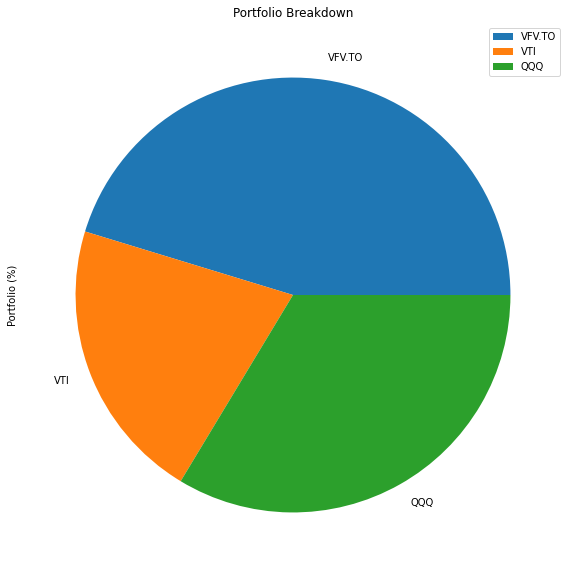

In [8]:
stock_portfolio['Portfolio (%)'].plot(kind='pie',
                             title='Portfolio Breakdown',
                             figsize=(10, 10),
                             legend=True)

### Stock Portfolio Return

In [9]:
stock_return

35.551282

### Stock Dividends

In [10]:
stock_dividends.loc['Total'] = stock_dividends.sum(numeric_only=True, axis=0)
stock_dividends.tail()

,Monthly_Dividend_Income
2021-07,6.43
2021-08,4.76
2021-09,3.87
2021-10,1.52
Total,55.21


## TAA Quantitative Investing

### Quant Balance

In [11]:
quant_bal

NameError: name 'quant_bal' is not defined

### Quant Portfolio

In [ ]:
quant_portfolio

In [ ]:
quant_portfolio['Portfolio (%)'].plot(kind='pie',
                             title='Portfolio Breakdown',
                             figsize=(10, 10),
                             legend=True)

### Quant Portfolio Return

In [ ]:
quant_return

### Quant Dividends

In [ ]:
quant_dividends.loc['Total'] = quant_dividends.sum(numeric_only=True, axis=0)
quant_dividends.tail()

In [ ]:
quant_dividends[:-1].plot(kind='bar',
                    title='Monthly Dividend Payments',
                    xlabel='Months',
                    ylabel='Dividend ($)',
                    figsize=(15, 10),
                    legend=False,
                    ylim=(0, 30))